In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mode

**CHATGEMENT DU JEU DE DONNEES**

In [ ]:
my_data=pd.read_csv("/content/Final_Bitcoin_dataset.csv")

**VISUALISATION**

**L'EN T√äTE**

In [ ]:
my_data.head()

Date        Close         High          Low         Open      Volume  \
0  2019-03-15  3960.911133  3968.542969  3914.015381  3926.663330  9394210605   
1  2019-03-16  4048.725830  4077.036377  3961.657471  3963.900146  9856166973   
2  2019-03-17  4025.229004  4054.122070  4006.411133  4047.719482  8221625400   
3  2019-03-18  4032.507324  4071.556641  4009.117188  4029.968506  9646954186   
4  2019-03-19  4071.190186  4082.216064  4023.812500  4032.691895  9344919956   

   fear_greed  
0        55.0  
1        54.0  
2        58.0  
3        56.0  
4        56.0

**LE DERNIER LIGNE DU DATA**

In [ ]:
my_data.tail()

Date         Close          High           Low          Open  \
2188  2025-03-11  82862.210938  83577.757812  76624.250000  78523.875000   
2189  2025-03-12  83722.359375  84358.578125  80635.250000  82857.375000   
2190  2025-03-13  81066.703125  84301.695312  79931.851562  83724.921875   
2191  2025-03-14  83969.101562  85263.289062  80797.562500  81066.992188   
2192  2025-03-15  84300.000000  84647.273438  83708.976562  83989.804688   

           Volume  fear_greed  
2188  54702837196        24.0  
2189  40353484454        34.0  
2190  31412940153        45.0  
2191  29588112414        27.0  
2192  13801613312        46.0

In [ ]:
my_data.shape

(2193, 7)

In [ ]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2193 non-null   object 
 1   Close       2193 non-null   float64
 2   High        2193 non-null   float64
 3   Low         2193 non-null   float64
 4   Open        2193 non-null   float64
 5   Volume      2193 non-null   int64  
 6   fear_greed  2192 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [ ]:
my_data.isna().sum()

Date          0
Close         0
High          0
Low           0
Open          0
Volume        0
fear_greed    1
dtype: int64

In [ ]:
my_data.isnull().sum()

Date          0
Close         0
High          0
Low           0
Open          0
Volume        0
fear_greed    1
dtype: int64

**RESUM√â STATISTIQUE**

In [ ]:
my_data.describe().transpose()

count          mean           std           min           25%  \
Close       2193.0  3.457725e+04  2.434170e+04  3.960911e+03  1.158493e+04   
High        2193.0  3.529667e+04  2.484661e+04  3.968543e+03  1.180006e+04   
Low         2193.0  3.375022e+04  2.376974e+04  3.914015e+03  1.129699e+04   
Open        2193.0  3.454253e+04  2.432902e+04  3.926663e+03  1.154872e+04   
Volume      2193.0  3.183552e+10  1.932146e+10  5.331173e+09  1.892708e+10   
fear_greed  2192.0  4.985584e+01  2.205195e+01  5.000000e+00  3.000000e+01   

                     50%           75%           max  
Close       2.917692e+04  4.936885e+04  1.061463e+05  
High        2.949801e+04  5.079716e+04  1.091149e+05  
Low         2.872027e+04  4.792586e+04  1.052917e+05  
Open        2.916907e+04  4.941348e+04  1.061473e+05  
Volume      2.777333e+10  3.900685e+10  3.509679e+11  
fear_greed  5.000000e+01  7.000000e+01  9.500000e+01

**INTERPRETATION**

In [ ]:
colonne_num=my_data.select_dtypes(include=['number']).columns
print(colonne_num)
print(my_data.columns)

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'fear_greed'], dtype='object')
Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'fear_greed'], dtype='object')


**Convertit la colonne 'Date' en format datetime et affiche des courbes temporelles pour les colonnes num√©riques ('Close', 'High', 'Low', 'Open', 'Volume', 'fear_greed').**

In [ ]:
def process_and_plot_timeseries(df):
    # V√©rification si la colonne 'Date' existe
    if 'Date' not in df.columns:
        raise ValueError("La colonne 'Date' est absente du DataFrame.")
    # Conversion de la colonne 'Date' en format datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    # Trier les donn√©es par date pour √©viter des erreurs d'affichage
    df = df.sort_values(by='Date')
    # Liste des colonnes num√©riques √† visualiser
    numeric_columns = ['Close', 'High', 'Low', 'Open', 'Volume', 'fear_greed']
    # V√©rification si toutes les colonnes existent
    missing_cols = [col for col in numeric_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Les colonnes suivantes sont absentes du DataFrame : {missing_cols}")
    # Cr√©ation des courbes temporelles
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(numeric_columns, 1):
        plt.subplot(2, 4, i)  # 2 lignes, 3 colonnes pour les subplots
        plt.plot(df['Date'], df[col], marker='o', linestyle='-', markersize=3, color='b', alpha=0.7)
        plt.title(f'√âvolution de {col} en fonction du temps')
        plt.xlabel('Date')
        plt.ylabel(col)
        plt.xticks(rotation=45)  # Rotation des dates pour meilleure lisibilit√©
    plt.tight_layout()  # Ajuste la disposition des graphes
    plt.show()

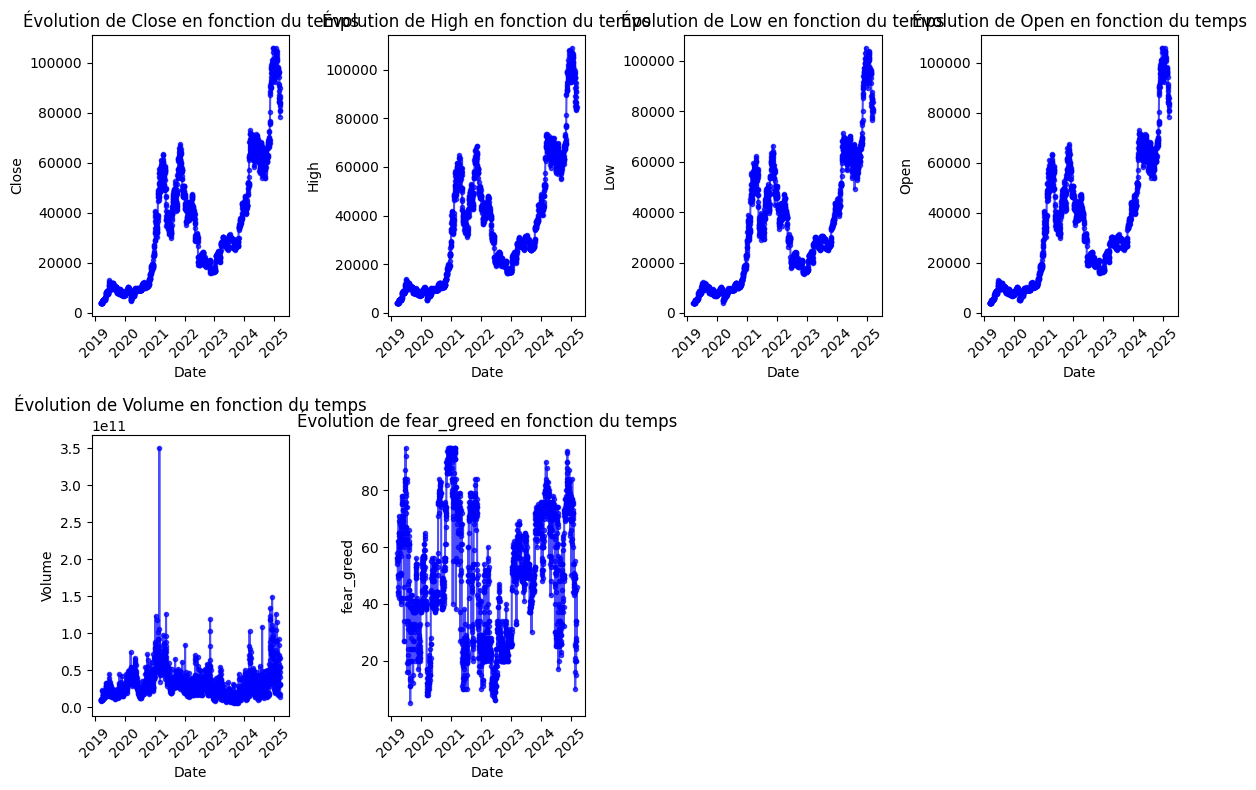

None


In [ ]:
resultat=process_and_plot_timeseries(my_data)
print(resultat)

**INTERPRETATION**

**Analyse univari√©**

Convertit la colonne 'Date' en format datetime et affiche des histogrammes pour les colonnes num√©riques ('Close', 'High', 'Low', 'Open', 'Volume', 'fear_greed')

In [ ]:
def process_and_plot_histograms(df):
    # V√©rification si la colonne 'Date' existe
    if 'Date' not in df.columns:
        raise ValueError("La colonne 'Date' est absente du DataFrame.")
    # Conversion de la colonne 'Date' en type datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    # Liste des colonnes num√©riques √† visualiser
    numeric_columns = ['Close', 'High', 'Low', 'Open', 'Volume', 'fear_greed']
    # V√©rification si toutes les colonnes existent
    missing_cols = [col for col in numeric_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Les colonnes suivantes sont absentes du DataFrame : {missing_cols}")
    # Cr√©ation des histogrammes avec statistiques et polygone de fr√©quence
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(numeric_columns, 1):
        plt.subplot(2, 3, i)  # 2 lignes, 3 colonnes pour les subplots
        data = df[col].dropna()
        # Histogramme
        counts, bins, _ = plt.hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=False)
        # Polygone de fr√©quence
        bin_centers = (bins[:-1] + bins[1:]) / 2
        plt.plot(bin_centers, counts, marker='o', linestyle='-', color='red', label='Polygone de fr√©quence')
        # Calcul des statistiques
        mean_value = np.mean(data)
        std_dev = np.std(data)
        variance = np.var(data)
        median_value = np.median(data)
        min_value = np.min(data)
        max_value = np.max(data)
        # Ajout des statistiques sur le graphe
        stats_text = (f"Moyenne: {mean_value:.2f}\n√âcart-type: {std_dev:.2f}\nVariance: {variance:.2f}\n"
                      f"M√©diane: {median_value:.2f}\nMin: {min_value:.2f}\nMax: {max_value:.2f}")
        plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10,
                 verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.7))
        plt.title(f'Histogramme de {col}')
        plt.xlabel(col)
        plt.ylabel('Fr√©quence')
        plt.legend()
    plt.tight_layout()
    plt.show()

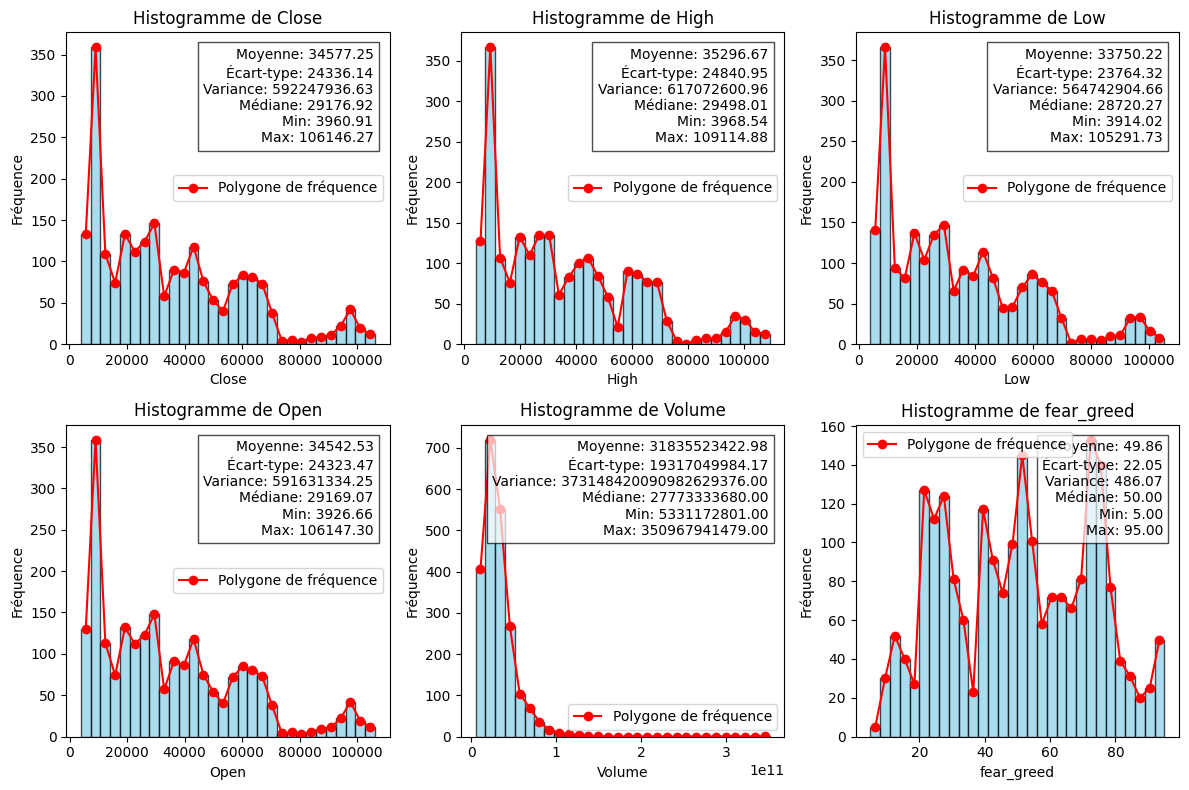

None


In [ ]:
result = process_and_plot_histograms(my_data)
print(result)

**INTERPRETATION**

Les polygones de fr√©quence des colonnes Close, High, Low, et Open sont pratiquement identiques, ce qui refl√®te une distribution similaire de ces variables. Ce ph√©nom√®ne se v√©rifie tant graphiquement qu'√† travers les calculs statistiques, car leurs moyennes, √©carts-types, valeurs minimales, maximales, m√©dianes, et variances sont presque identiques.

De plus, toutes ces colonnes pr√©sentent une distribution asym√©trique, √† l'exception de la colonne fear_greed. En effet, pour cette derni√®re, la m√©diane est √©gale √† 50 et la moyenne (ou esp√©rance) est de 49,86. Bien que le mode ne soit pas calcul√© ici, on peut en d√©duire que la distribution de fear_greed est relativement sym√©trique, puisque la m√©diane, la moyenne et le mode se trouvent tr√®s proches l'un de l'autre.

**l'analyse bivari√©**

In [ ]:
def bivariate_analysis(df):
    # V√©rification si la colonne 'Date' existe
    if 'Date' not in df.columns:
        raise ValueError("La colonne 'Date' est absente du DataFrame.")
    # Conversion de la colonne 'Date' en format datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    # Liste des colonnes num√©riques √† analyser
    numeric_columns = ['Close', 'High', 'Low', 'Open', 'Volume', 'fear_greed']
    # V√©rification de la pr√©sence des colonnes
    missing_cols = [col for col in numeric_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Les colonnes suivantes sont absentes du DataFrame : {missing_cols}")
    # Trier les donn√©es par date
    df = df.sort_values(by='Date')
    # üîπ Affichage des scatter plots (relation entre chaque paire de variables)
    sns.pairplot(df[numeric_columns], diag_kind='kde', plot_kws={'alpha':0.7, 's':10})
    plt.suptitle("Analyse Bivari√©e - Nuages de points", y=1.02)
    plt.show()
    # üîπ Matrice de corr√©lation
    plt.figure(figsize=(8, 6))
    correlation_matrix = df[numeric_columns].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Matrice de Corr√©lation")
    plt.show()

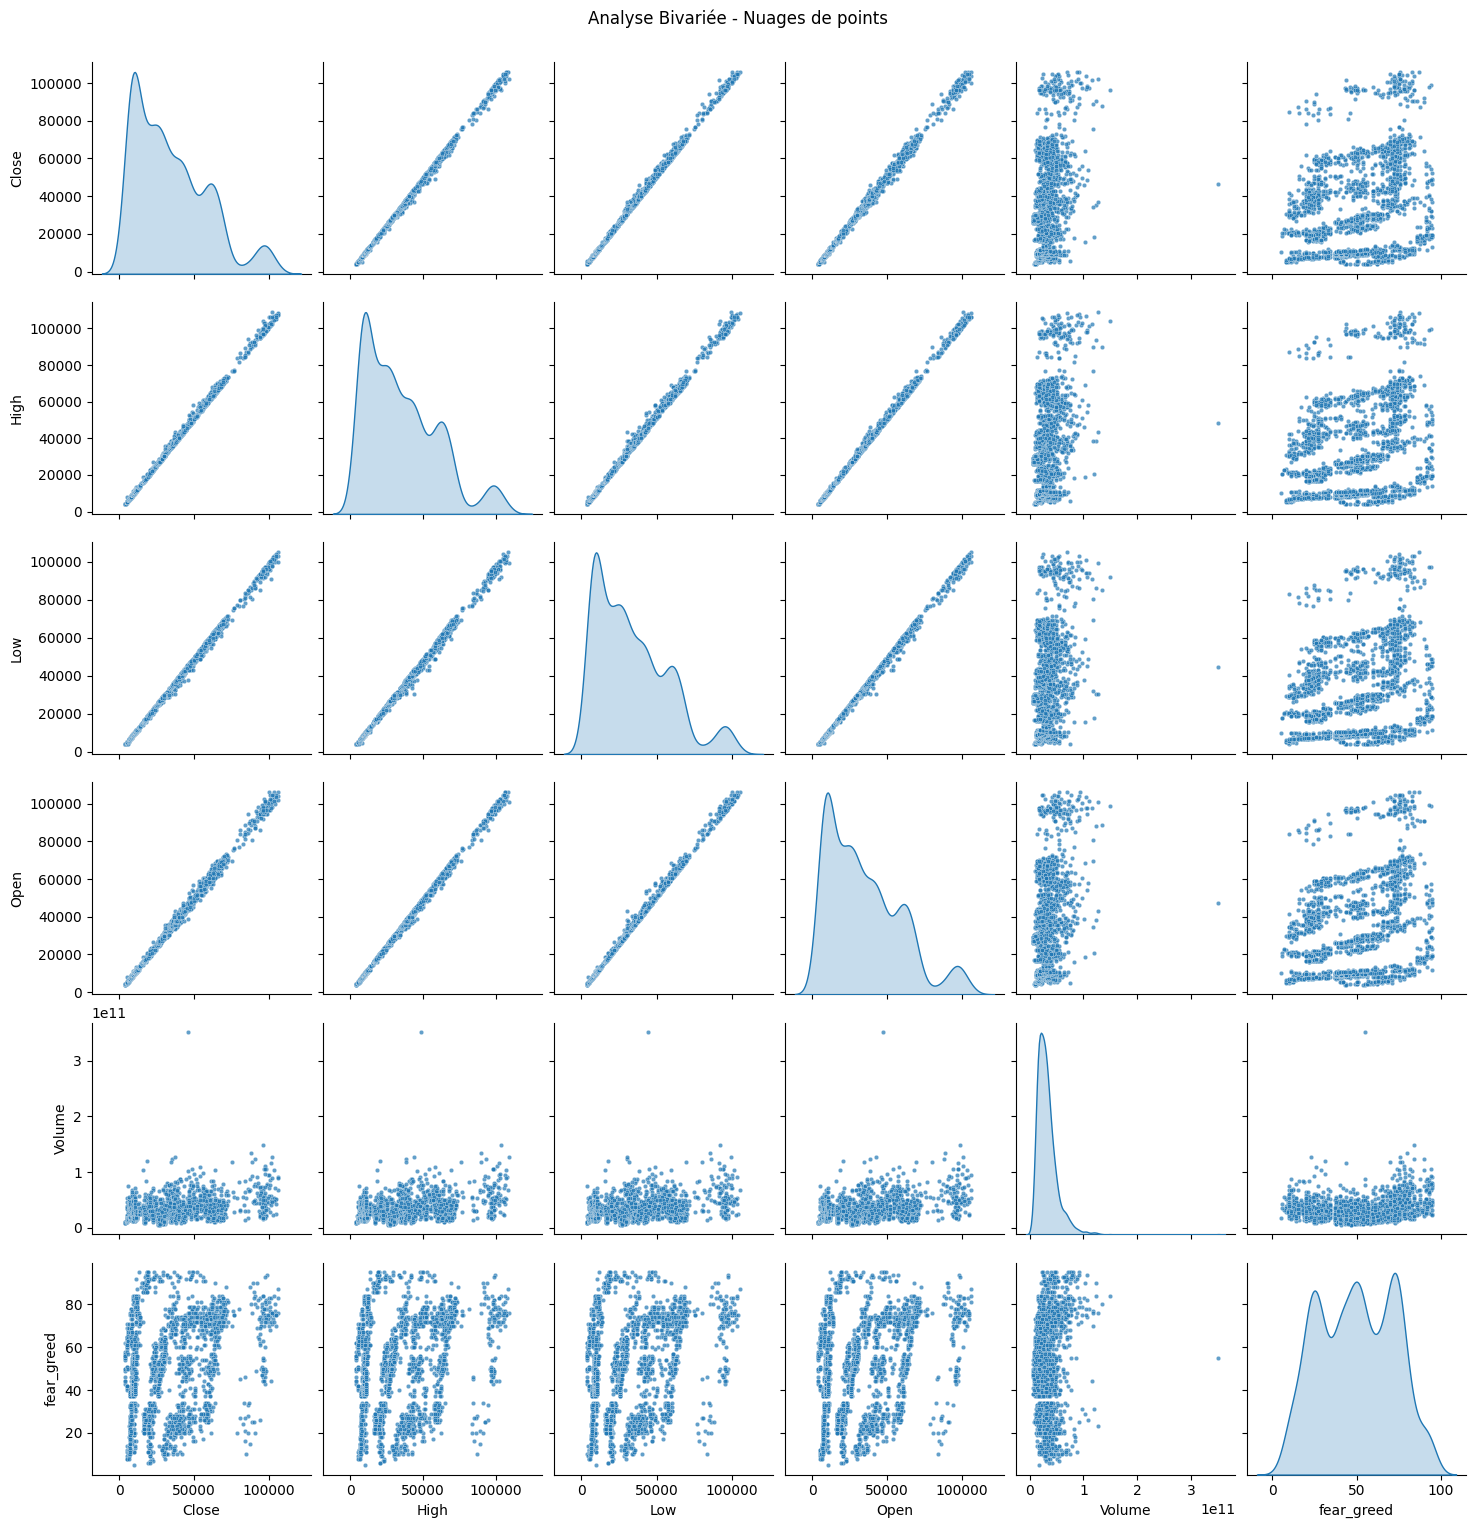

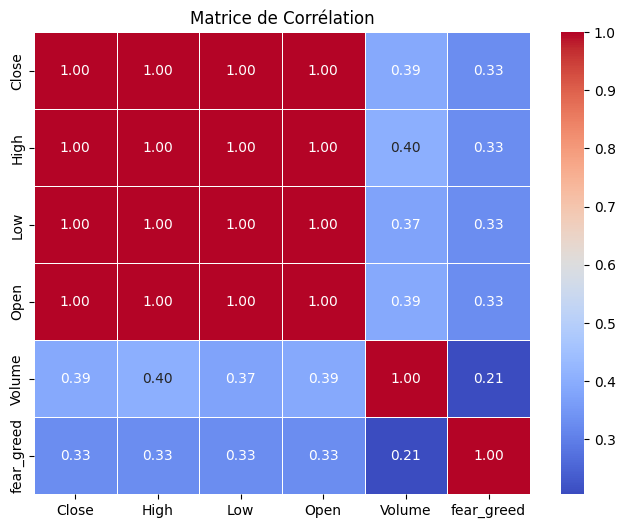

None


In [ ]:
resultat3=bivariate_analysis(my_data)
print(resultat3)

**INTERPRETATION DES GRAPHES ET DE LA MATRICE DE CORRELATION**

**MATRICE DE COLLERATION**

**correlation fort positive**

**Les valeurs des colonnes [Fear_gread, Volume, Open, Low, High, Close], correspondant respectivement aux lignes [Fear_gread, Volume, Open, Low, High, Close] dans la matrice de corr√©lation, sont toutes √©gales √† 1. Cela indique une forte corr√©lation entre ces diff√©rentes variables.

De plus, les variables [Open, Low, High, Close], prises individuellement (par exemple, Open avec les autres variables Low, High, Close), pr√©sentent √©galement une correspondance de 1 dans la matrice de corr√©lation (sauf pour elles-m√™mes). Cela confirme qu'il existe une forte corr√©lation entre ces variables.**


**INTERPRETATION A LA LUMIERE DE LA VARIABLE CLOSE**

1Ô∏è‚É£ Corr√©lation forte entre Close et [Open, Low, High]

Puisque la matrice de corr√©lation montre une valeur de 1 entre Close et ces variables, cela signifie qu'elles √©voluent presque de mani√®re identique.

Cela est logique, car dans les march√©s financiers, le prix de cl√¥ture (Close) est souvent proche des prix d'ouverture (Open), du plus bas (Low) et du plus haut (High) de la journ√©e.

**EN R√âSUM√â**
Toutes les variables [Fear_gread, Volume, Open, Low, High, Close] ont une corr√©lation de 1 entre elles, ce qui indique une relation lin√©aire parfaite.

En particulier, les variables [Open, Low, High, Close] sont fortement corr√©l√©es entre elles, ce qui signifie qu'elles √©voluent ensemble de mani√®re identique


**correlation positive mod√©r√©e √† valeurs compris entre 0.3 et 0.7**

L'analyse des lignes [Fear_gread, Volume] avec toutes les colonnes [Open, Low, High, Close] montre que leurs valeurs sont comprises entre 0.3 et 0.7.

D'autre part, en analysant individuellement les lignes [Open, Low, High, Close] avec les colonnes [Fear_gread, Volume], on obtient √©galement des valeurs comprises entre 0.3 et 0.7.

Cela signifie que ces diff√©rentes variables sont faiblement corr√©l√©es, c'est-√†-dire qu'il existe une certaine relation lin√©aire entre elles, mais cette relation n'est pas aussi forte qu'une corr√©lation √©lev√©e.

****INTERPRETATION A LA LUMIERE DE LA VARIABLE CLOSE****

2Ô∏è‚É£ Corr√©lation mod√©r√©e entre Close et [Fear_gread, Volume] (0.3 - 0.7)

La variable Close entretient une relation faible √† mod√©r√©e avec Fear_gread et Volume.

Cela signifie que le sentiment de peur/avidit√© (Fear_gread) et le volume d'√©change (Volume) ont une certaine influence sur le prix de cl√¥ture, mais cette relation n'est pas forte.

En pratique, cela peut indiquer que d'autres facteurs influencent Close, et que Fear_gread et Volume ne sont pas des pr√©dicteurs suffisants √† eux seuls.

**correlation faibles a valeurs compris entre 0 et 0.3**

L'analyse de la variable Fear_gread avec Volume donne une valeur comprise entre 0 et 0.3, ce qui indique une corr√©lation faible.

Cela signifie qu'il existe une tr√®s faible relation lin√©aire entre ces deux variables, presque n√©gligeable. En d'autres termes, la variation de Fear_gread influence tr√®s peu la variation de Volume, et vice versa.

**INTERPRETATION A LA LUMIERE DE LA VRIABLE CLOSE**

3Ô∏è‚É£ Corr√©lation tr√®s faible entre Fear_gread et Volume (0 - 0.3)

Comme leur corr√©lation est quasi nulle, cela signifie que le sentiment du march√© (Fear_gread) et le volume des transactions (Volume) ne varient pas de mani√®re pr√©visible ensemble.

En d'autres termes, une augmentation du volume d‚Äô√©change ne refl√®te pas forc√©ment une peur ou une confiance du march√©, et vice versa.

 **Conclusion**
Close est fortement li√© √† Open, Low, High, ce qui est attendu dans un march√© financier.

Close a une influence mod√©r√©e de Fear_gread et Volume, mais ces variables ne suffisent pas √† pr√©dire son √©volution.

Fear_gread et Volume sont tr√®s faiblement corr√©l√©s, donc le sentiment du march√© n‚Äôexplique pas directement l‚Äôintensit√© des √©changes.

**INTERPRETATION GRAPHIQUE**

Comme dans le cas de la matrice de confusion, les diff√©rents graphiques permettent de visualiser l'√©volution des diff√©rentes variables les unes par rapport aux autres et par rapport √† elles-m√™mes.

Ce qui est particuli√®rement int√©ressant, c'est que :

Les nuages de points sont presque lin√©aires pour les variables fortement corr√©l√©es, indiquant une relation lin√©aire √©vidente entre elles.

Pour les variables faiblement corr√©l√©es, les nuages de points ont une structure plus dispers√©e et particuli√®re, ce qui rend la relation lin√©aire moins √©vidente entre ces variables.

Cependant, lorsqu'on analyse chaque variable individuellement, on observe graphiquement une courbe repr√©sentant son √©volution et sa diminution progressive en fonction du temps ou d'elle-m√™me (sauf pour Fear_gread).

Cas particulier de Fear_gread :

Son graphique pr√©sente des pics qui indiquent des valeurs marqu√©es, ainsi que des courbes en forme de V.

La partie basse de ces courbes repr√©sente les valeurs minimales.

Cela signifie que les valeurs de la ligne Fear_gread en fonction des prix ont une relation lin√©aire, mais faible.

****